In [126]:
import requests
import pandas as pd
import finnhub
import matplotlib.pyplot as plt

In [127]:
API_KEY_ALPHA_VANTAGE = ""

In [128]:
def collect_news_data(query, api_key=API_KEY_ALPHA_VANTAGE):
    """Collect news headlines data from Alpha Vantage News API."""
    url = f"https://www.alphavantage.co/query?{query}" +f"&apikey={api_key}"
    response = requests.get(url)
    news_data = response.json()
    headlines = [[item[key] for key in ["title", "url", "time_published", "source", "overall_sentiment_score", "overall_sentiment_label", "ticker_sentiment"]] for item in news_data.get("feed", [])]
    df = pd.DataFrame(headlines, columns=["title", "url", "time_published", "source", "overall_sentiment_score", "overall_sentiment_label", "ticker_sentiment"])
    return df

In [129]:
# Define the start and end timestamps
start_time = "20230901T0000"
end_time = "20240901T0000"

# Convert the string timestamps to pandas datetime objects
start_date = pd.to_datetime(start_time, format="%Y%m%dT%H%M")
end_date = pd.to_datetime(end_time, format="%Y%m%dT%H%M")

# Create a list to hold the date ranges
date_ranges = []

# Iterate from start_date to end_date in increments of 6 days
current_date = start_date
while current_date < end_date:
    # Define the end date for the current interval
    interval_end = current_date + pd.DateOffset(days=5)  # 6 days later (inclusive)

    # Append the formatted date range to the list
    date_ranges.append((current_date.strftime('%Y%m%dT0000'), interval_end.strftime('%Y%m%dT2359')))

    # Move to the next interval
    current_date += pd.DateOffset(days=6)

# Display the results
print(date_ranges)

[('20230901T0000', '20230906T2359'), ('20230907T0000', '20230912T2359'), ('20230913T0000', '20230918T2359'), ('20230919T0000', '20230924T2359'), ('20230925T0000', '20230930T2359'), ('20231001T0000', '20231006T2359'), ('20231007T0000', '20231012T2359'), ('20231013T0000', '20231018T2359'), ('20231019T0000', '20231024T2359'), ('20231025T0000', '20231030T2359'), ('20231031T0000', '20231105T2359'), ('20231106T0000', '20231111T2359'), ('20231112T0000', '20231117T2359'), ('20231118T0000', '20231123T2359'), ('20231124T0000', '20231129T2359'), ('20231130T0000', '20231205T2359'), ('20231206T0000', '20231211T2359'), ('20231212T0000', '20231217T2359'), ('20231218T0000', '20231223T2359'), ('20231224T0000', '20231229T2359'), ('20231230T0000', '20240104T2359'), ('20240105T0000', '20240110T2359'), ('20240111T0000', '20240116T2359'), ('20240117T0000', '20240122T2359'), ('20240123T0000', '20240128T2359'), ('20240129T0000', '20240203T2359'), ('20240204T0000', '20240209T2359'), ('20240210T0000', '20240215

In [130]:
dfs = []

for start, end in date_ranges:
  df = collect_news_data(f"function=NEWS_SENTIMENT&topics=technology&time_from={start}&time_to={end}&sort=LATEST&limit=1000")
  dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df['time_published'] = pd.to_datetime(merged_df['time_published'])

merged_df = merged_df.sort_values(by='time_published')

merged_df.to_csv(f"technology_news_data (6 day increments).csv", index=False)

print(len(merged_df))
display(merged_df)

<ipython-input-130-934d283be580>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(dfs, ignore_index=True)


18898


,title,url,time_published,source,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
457,"Murdaugh's Lawyers Seek New Trial, Saying Cler...",https://www.nytimes.com/2023/09/05/us/alex-mur...,2023-09-05 21:46:57,New York Times,-0.035904,Neutral,"[{'ticker': 'META', 'relevance_score': '0.0488..."
456,"eFuse Postpones 'Creator League,' Will Process...",https://www.benzinga.com/pressreleases/23/09/n...,2023-09-05 21:50:00,Benzinga,0.203994,Somewhat-Bullish,"[{'ticker': 'ATVI', 'relevance_score': '0.0669..."
455,Cadence Design Systems ( CDNS ) Gains As Mar...,https://www.zacks.com/stock/news/2145083/caden...,2023-09-05 21:50:18,Zacks Commentary,0.206397,Somewhat-Bullish,"[{'ticker': 'CDNS', 'relevance_score': '0.5778..."
454,Arista Networks ( ANET ) Gains As Market Dip...,https://www.zacks.com/stock/news/2145082/arist...,2023-09-05 21:50:18,Zacks Commentary,0.208715,Somewhat-Bullish,"[{'ticker': 'ANET', 'relevance_score': '0.6599..."
453,Baker Hughes ( BKR ) Gains As Market Dips: W...,https://www.zacks.com/stock/news/2145119/baker...,2023-09-05 22:15:07,Zacks Commentary,0.204814,Somewhat-Bullish,"[{'ticker': 'BKR', 'relevance_score': '0.66488..."
...,...,...,...,...,...,...,...
18180,"ROSEN, TOP RANKED GLOBAL COUNSEL, Encourages M...",https://www.benzinga.com/pressreleases/24/02/g...,2024-02-03 22:11:00,Benzinga,0.147147,Neutral,"[{'ticker': 'MSS', 'relevance_score': '0.30619..."
18561,The Apple Vision Pro Is Spectacular and Sad,https://www.theatlantic.com/technology/archive...,2024-02-03 22:25:12,The Atlantic,0.111829,Neutral,"[{'ticker': 'BBY', 'relevance_score': '0.02084..."
18179,Opinion: The problem with the US bombing strikes,https://www.cnn.com/2024/02/03/opinions/proble...,2024-02-03 22:34:00,CNN,-0.211450,Somewhat-Bearish,"[{'ticker': 'SPOT', 'relevance_score': '0.0349..."
18560,Bay Area's Exodus Ebb: Homebuyers Return As Of...,https://www.benzinga.com/general/24/02/3692402...,2024-02-03 22:54:24,Benzinga,0.096788,Neutral,"[{'ticker': 'GOOG', 'relevance_score': '0.0653..."


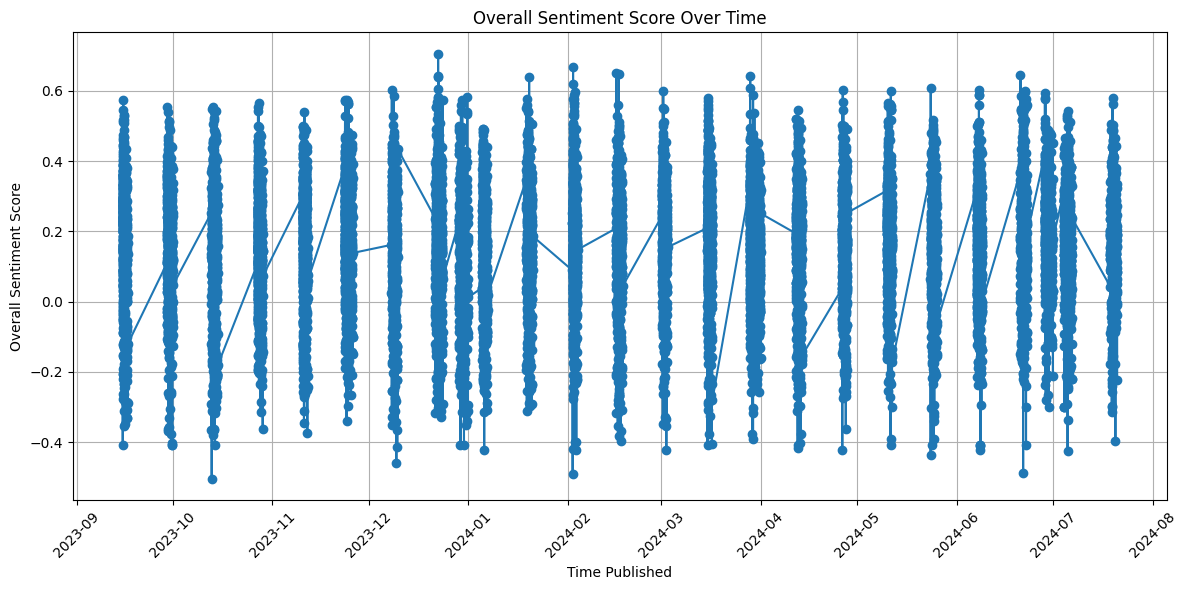

In [107]:
df = sorted_df

df['time_published'] = pd.to_datetime(df['time_published'])

# Sort DataFrame by time for proper plotting
df = df.sort_values(by='time_published')

plt.figure(figsize=(12, 6))
plt.plot(df['time_published'], df['overall_sentiment_score'], marker='o', linestyle='-')
plt.title('Overall Sentiment Score Over Time')
plt.xlabel('Time Published')
plt.ylabel('Overall Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

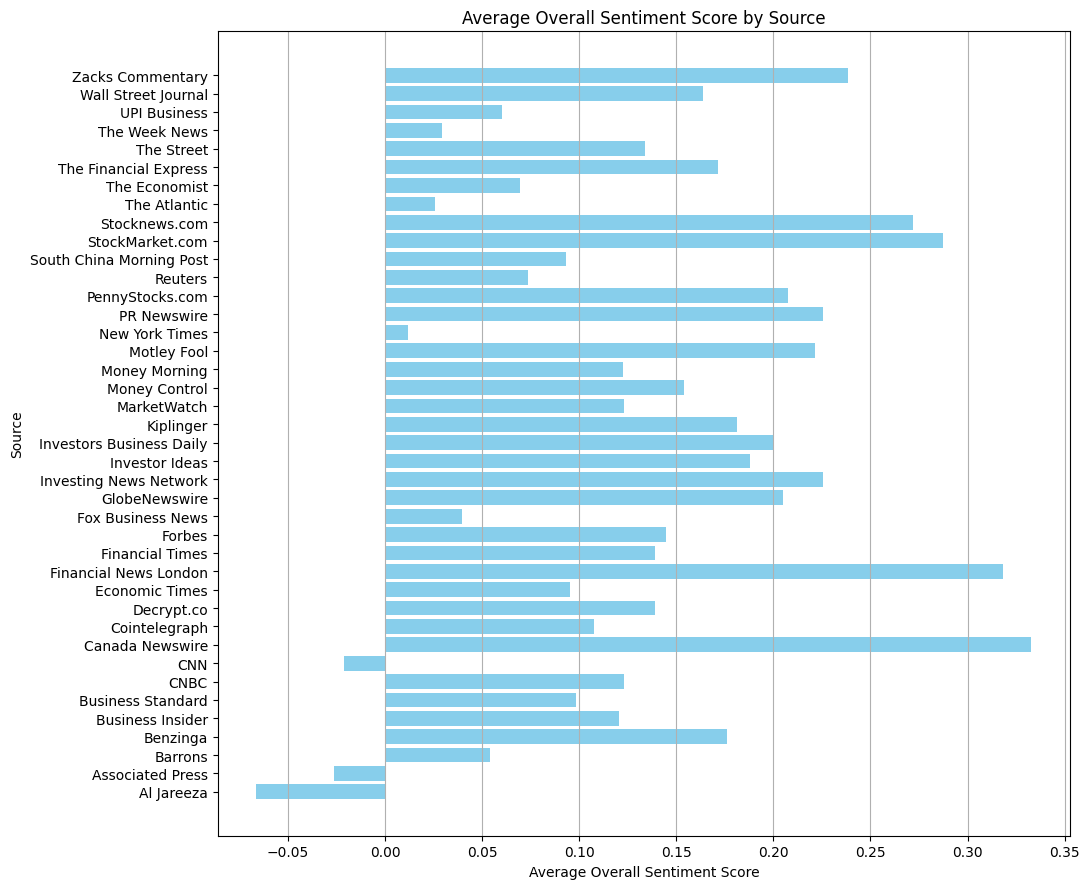

In [108]:
sentiment_by_source = df.groupby('source')['overall_sentiment_score'].mean().reset_index()

plt.figure(figsize=(11, 9))
plt.barh(sentiment_by_source['source'], sentiment_by_source['overall_sentiment_score'], color='skyblue')
plt.title('Average Overall Sentiment Score by Source')
plt.xlabel('Average Overall Sentiment Score')
plt.ylabel('Source')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

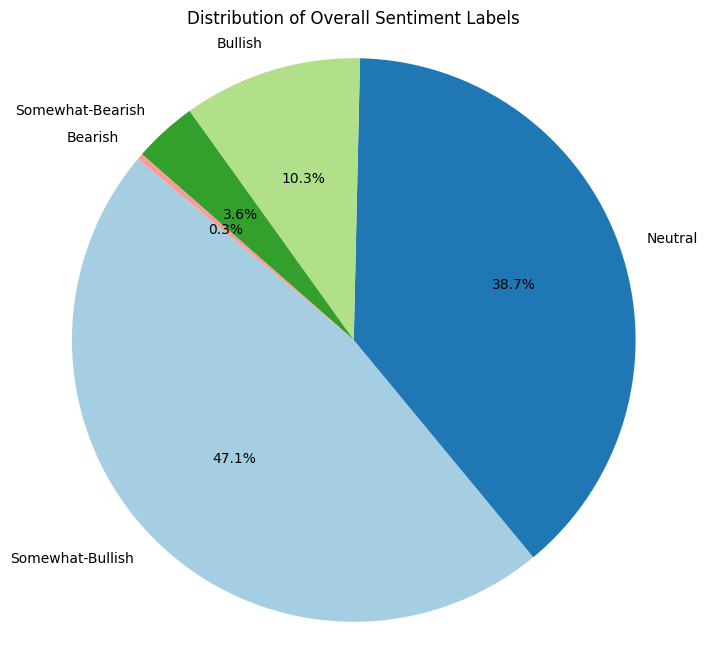

In [109]:
sentiment_counts = df['overall_sentiment_label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Overall Sentiment Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

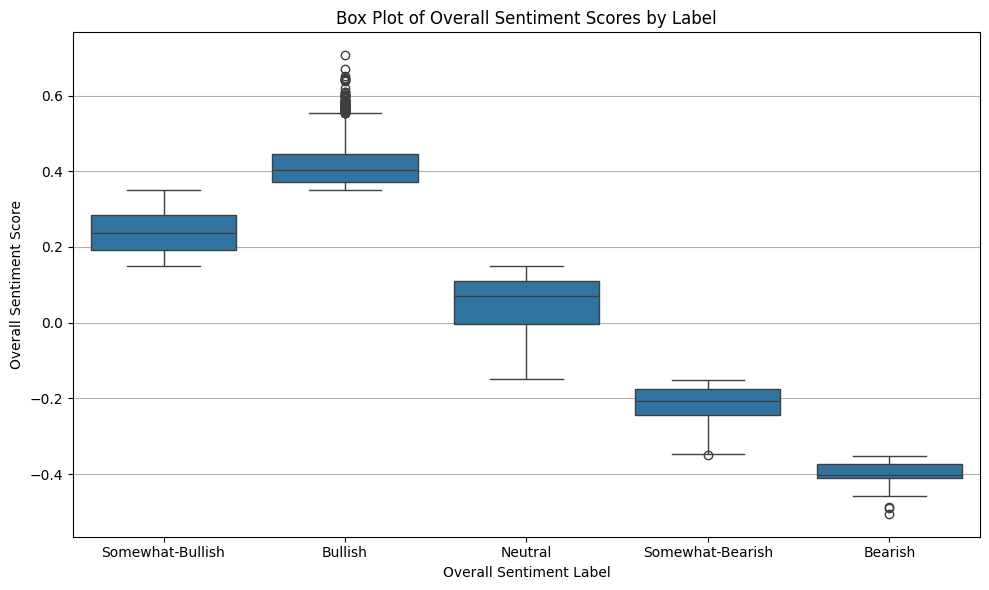

In [110]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='overall_sentiment_label', y='overall_sentiment_score', data=df)
plt.title('Box Plot of Overall Sentiment Scores by Label')
plt.xlabel('Overall Sentiment Label')
plt.ylabel('Overall Sentiment Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

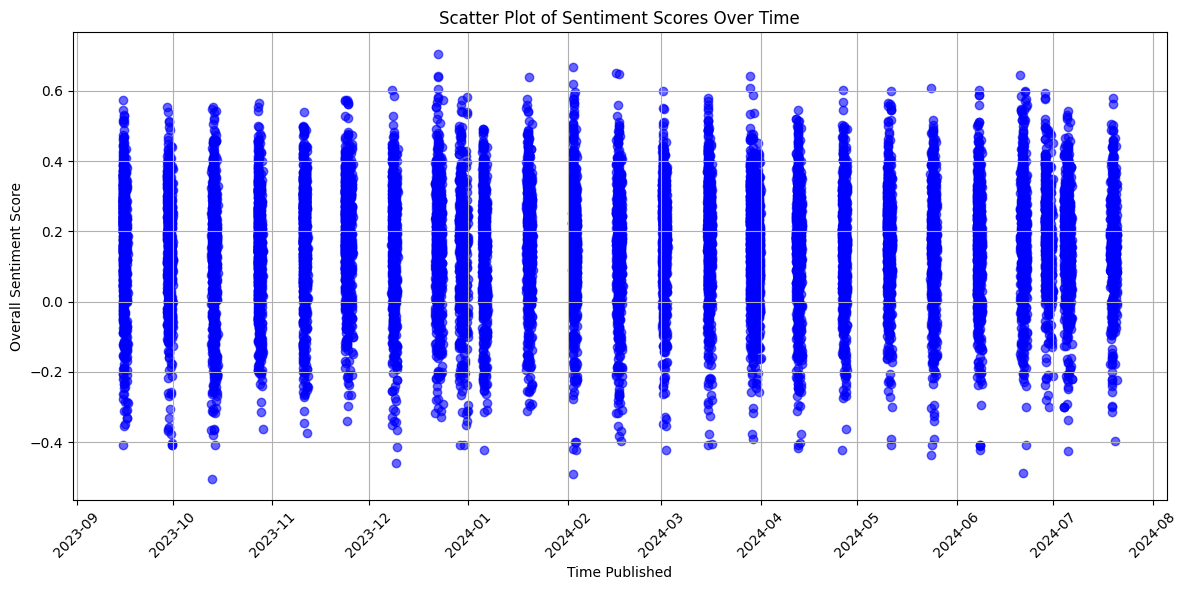

In [111]:
plt.figure(figsize=(12, 6))
plt.scatter(df['time_published'], df['overall_sentiment_score'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Sentiment Scores Over Time')
plt.xlabel('Time Published')
plt.ylabel('Overall Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()